# 31 Yashraj Deepak Devrat
# Project : ANN Mini Project

## Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2
import tensorflow as tf
from IPython.display import display
from PIL import Image

from PIL import Image
import os
os.chdir('/home/yashraj/ANN Assignments/Mini Project ') #path 
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

2023-05-18 17:29:57.743634: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 17:29:58.087384: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yashraj/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-18 17:29:58.087418: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-18 17:29:59.132265: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dler

## Store data, labels in the list

In [2]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [3]:
cur_path

'/home/yashraj/ANN Assignments/Mini Project '

## Preprocess the images

In [4]:
# for loop for iterating 
for i in range(classes):           
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '//'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)    # append in data
            labels.append(i)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [5]:
data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [6]:
#os.mkdir('training')

np.save('/home/yashraj/ANN Assignments/Mini Project',data)
np.save('/home/yashraj/ANN Assignments/Mini Project',labels)

In [7]:
# data=np.load('training/data.npy')
# labels=np.load('training/target.npy')

## Load data & Labels

In [8]:
print(data.shape)

(39209, 30, 30, 3)


In [9]:
print( labels.shape)

(39209,)


In [10]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Same shape 

(39209, 30, 30, 3) (39209,)
(27446, 30, 30, 3) (11763, 30, 30, 3) (27446,) (11763,)


In [11]:
import numpy as np

# assume arr1 has 11763 samples and arr2 has 12630 samples
arr1 = np.random.rand(11763, 10)
arr2 = np.random.rand(12630, 10)

# trim the larger array to match the size of the smaller array
arr2 = arr2[:11763, :]

# perform the desired operation
result = arr1 + arr2


In [12]:
result

array([[0.47114963, 1.1785987 , 1.05653651, ..., 1.6009731 , 1.53143155,
        0.77404817],
       [0.71041683, 1.3963747 , 1.25054389, ..., 1.61570454, 1.27605934,
        0.95895188],
       [0.95105003, 1.57711907, 0.36788174, ..., 0.65650367, 0.41295619,
        1.03857704],
       ...,
       [0.55493316, 0.94818968, 0.72435779, ..., 0.20065823, 1.10354714,
        1.08238483],
       [0.47759127, 1.68844106, 0.97588537, ..., 1.39511502, 0.92559996,
        1.63438088],
       [1.04767688, 0.53687411, 1.2217413 , ..., 1.00395801, 1.38996665,
        0.62245176]])

## Convert labels to onehot encoding

In [13]:
y_train = to_categorical(y_train, 43)  # 43 labels
y_test = to_categorical(y_test, 43)

## Build Model

In [14]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='tanh', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='tanh'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(2, 2), activation='tanh'))
model.add(Conv2D(filters=64, kernel_size=(2, 2), activation='tanh'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.28))
model.add(Flatten())
model.add(Dense(256, activation='tanh'))
model.add(Dropout(rate=0.5))
# 43 classes so defined 43 in the dense
model.add(Dense(43, activation='softmax'))

2023-05-18 17:30:16.633478: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/yashraj/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-05-18 17:30:16.636725: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-18 17:30:16.636803: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (yashraj-IdeaPad-3-15ADA05-Ua): /proc/driver/nvidia/version does not exist
2023-05-18 17:30:16.637488: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with th

In [15]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# training model
epochs = 5
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model1.h5")


Epoch 1/5
858/858 [==============================] - 76s 87ms/step - loss: 0.7530 - accuracy: 0.7836 - val_loss: 0.1482 - val_accuracy: 0.9620
Epoch 2/5
858/858 [==============================] - 84s 97ms/step - loss: 0.2261 - accuracy: 0.9340 - val_loss: 0.1025 - val_accuracy: 0.9745
Epoch 3/5
858/858 [==============================] - 85s 99ms/step - loss: 0.2151 - accuracy: 0.9324 - val_loss: 0.1014 - val_accuracy: 0.9711
Epoch 4/5
858/858 [==============================] - 91s 106ms/step - loss: 0.2036 - accuracy: 0.9374 - val_loss: 0.1097 - val_accuracy: 0.9680
Epoch 5/5
858/858 [==============================] - 88s 103ms/step - loss: 0.1763 - accuracy: 0.9455 - val_loss: 0.0970 - val_accuracy: 0.9699


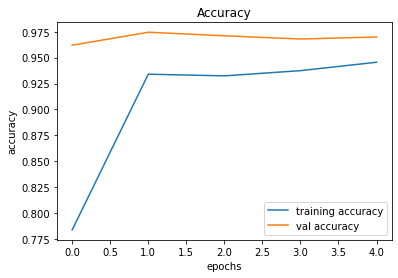

In [17]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

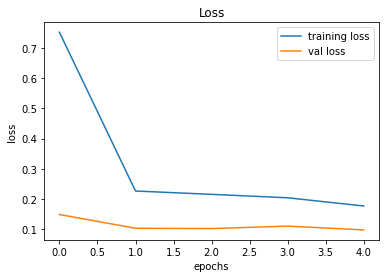

In [18]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Testing on Test data

In [19]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label 



In [20]:
X_test, label =  testing('Test.csv')

In [21]:
label

array([16,  1, 38, ...,  6,  7, 10])

In [22]:
X_test

array([[[[116, 140, 175],
         [116, 138, 171],
         [119, 138, 173],
         ...,
         [102, 119, 150],
         [101, 122, 149],
         [ 93, 112, 139]],

        [[116, 142, 177],
         [116, 141, 175],
         [117, 141, 174],
         ...,
         [120, 143, 178],
         [122, 144, 176],
         [122, 142, 174]],

        [[118, 142, 174],
         [116, 141, 175],
         [114, 140, 172],
         ...,
         [121, 144, 181],
         [122, 144, 180],
         [119, 142, 178]],

        ...,

        [[117, 137, 168],
         [115, 135, 165],
         [116, 135, 164],
         ...,
         [116, 138, 170],
         [116, 136, 168],
         [118, 139, 171]],

        [[116, 136, 166],
         [115, 134, 167],
         [115, 133, 165],
         ...,
         [114, 135, 168],
         [116, 136, 166],
         [115, 139, 167]],

        [[112, 135, 166],
         [111, 134, 165],
         [119, 135, 166],
         ...,
         [115, 137, 166],
        

In [23]:
 #Make predictions
Y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
Y_pred_classes = np.argmax(Y_pred, axis=1)

print(Y_pred_classes)

395/395 [==============================] - 10s 26ms/step
[16  1 38 ...  8  7 10]


## Accuracy with the test data

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# assume y_true and y_pred are your true and predicted target variables respectively
#print(classification_report(y_test, Y_pred[:len(y_test)], digits=4))

# //print(classification_report(y_test, Y_pred, digits=4))
# print(accuracy_score(label, Y_pred))
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


395/395 [==============================] - 10s 26ms/step


In [25]:
model.evaluate(X_test,y_pred)

395/395 [==============================] - 10s 24ms/step - loss: 0.1670 - accuracy: 1.0000


[0.16697737574577332, 1.0]

In [26]:
import numpy as np
from sklearn.metrics import classification_report

# Example data
y_test = np.array([0, 1, 0, 1, 1])
Y_pred = np.array([1, 1, 0, 1])

# Check shapes
print(y_test.shape)
print(Y_pred.shape)

# Ensure that y_test and Y_pred have the same number of elements
if y_test.shape[0] != Y_pred.shape[0]:
    min_len = min(y_test.shape[0], Y_pred.shape[0])
    y_test = y_test[:min_len]
    Y_pred = Y_pred[:min_len]

# Now y_test and Y_pred have the same number of elements
print(y_test.shape)
print(Y_pred.shape)

# Call classification_report
print(classification_report(y_test, Y_pred, digits=4))


(5,)
(4,)
(4,)
(4,)
              precision    recall  f1-score   support

           0     1.0000    0.5000    0.6667         2
           1     0.6667    1.0000    0.8000         2

    accuracy                         0.7500         4
   macro avg     0.8333    0.7500    0.7333         4
weighted avg     0.8333    0.7500    0.7333         4



## Save the model

In [27]:
my_model=model.save("TSR.h5")

In [28]:
from keras.models import load_model
model = load_model('TSR.h5')

In [29]:
# 43 Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    #Y_pred = model.predict_classes(X_test)
    Y_pred = np.argmax(model.predict(X_test), axis=-1)

    return image,Y_pred

In [1]:
plot,prediction = test_on_img(r'/home/yashraj/ANN Assignments/Mini Project /Test/00124.png')
s = [str(i) for i in prediction]   # convert list to string
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

NameError: name 'test_on_img' is not defined

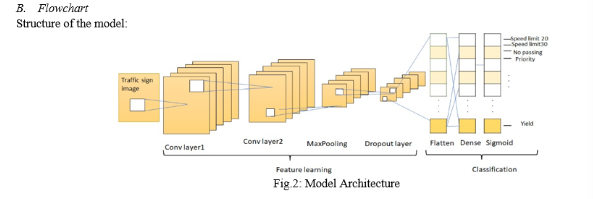